# HDA - Project 3
## TASK B1: Activity detection
This task consists of a binary classification, where a gesture denotes activity and thus the model detects wheter there is a gesture label or not (labeled in column 6).

This first cell contains the parameters that can be tuned for code execution:
- subject: select the subject on which to test the model, between [1,4];
- folder: directory name where '.mat' files are stored;
- label_col: index of feature column to be selected to perform activity detection, between [0,6];
- window_size: parameter that sets the length of temporal windows on which to perform the convolution;
- stride: step length to chose the next window.

In [1]:
subject = 1
folder = "./data/"
label_col = 6     # 6 is default for task B1
window_size = 15
stride = 15
make_binary = True

In [2]:
import utils
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
from keras.optimizers import Adam

Using TensorFlow backend.


Creation of training set and test set

In [3]:
# import all sessions for a subject
(data1, data2, data3, data4, data5, data6) = utils.loadData(subject, folder=folder)

# create training set and test set
X_train = np.concatenate((data1['features_interp'],\
                          data2['features_interp'],\
                          data3['features_interp'],\
                          data6['features_interp']), axis=0)

Y_train = np.concatenate((data1['labels_cut'][:,label_col],\
                          data2['labels_cut'][:,label_col],\
                          data3['labels_cut'][:,label_col],\
                          data6['labels_cut'][:,label_col]), axis=0)

X_test = np.concatenate((data4['features_interp'],\
                         data5['features_interp']), axis=0)

Y_test = np.concatenate((data4['labels_cut'][:,label_col],\
                         data5['labels_cut'][:,label_col]))

features = X_test.shape[1]
print("\nTraining samples: ", X_train.shape[0],\
      "\nTest samples:      ", X_test.shape[0],\
      "\nFeatures:            ", features)

# decision to overcome the problem of entire missing columns
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)

# features normalization
scaler = StandardScaler().fit(X_train)
X_train =scaler.transform(X_train)
X_test = scaler.transform(X_test)

# make the problem binary
if make_binary:
    Y_train[Y_train != 0] = 1
    Y_test[Y_test != 0] = 1

# switch to one hot encoded labels
onehot_encoder = OneHotEncoder(sparse=False)
Y_train_oh = onehot_encoder.fit_transform(Y_train.reshape(-1, 1))
Y_test_oh = onehot_encoder.fit_transform(Y_test.reshape(-1, 1))
print("\nClasses in training set: ", Y_train_oh.shape[1],\
      "\nClasses in test set:     ", Y_test_oh.shape[1])


Session shapes:
ADL1:   (45810, 110)
ADL2:   (28996, 110)
ADL3:   (30167, 110)
ADL4:   (30228, 110)
ADL5:   (27308, 110)
Drill:  (52152, 110)

Training samples:  157125 
Test samples:       57536 
Features:             110

Classes in training set:  2 
Classes in test set:      2


Preparation of data in a input-suitable form

In [4]:
X_train_s, Y_train_s = utils.prepareData(X_train, Y_train_oh, window_size, stride, shuffle=False)
X_test_s, Y_test_s = utils.prepareData(X_test, Y_test_oh, window_size, stride, shuffle=False)


Features have shape:  (10474, 15, 110) 
Labels have shape:    (10474, 2) 
Fraction of labels:   [0.66612564 0.33387436]

Features have shape:  (3834, 15, 110) 
Labels have shape:    (3834, 2) 
Fraction of labels:   [0.77464789 0.22535211]


<Figure size 2880x1440 with 0 Axes>

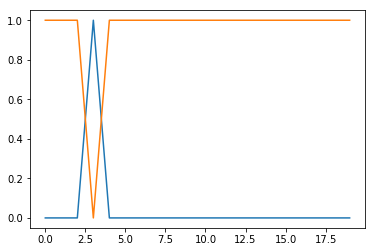

<Figure size 2880x1440 with 0 Axes>

In [5]:
plt.plot(Y_train_s[8980:9000, :])

plt.figure(figsize=(40,20))

In [6]:
classes = np.max((Y_train_s.shape[1], Y_test_s.shape[1]))

In [7]:
model_unidim = utils.Model1D((window_size, features), classes)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 15, 18)            9918      
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 18)            72        
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 15, 18)            0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 8, 18)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 8, 36)             4572      
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 36)             144       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 8, 36)             0         
__________

In [8]:
opt = Adam(lr=0.01)
model_unidim.compile(optimizer = opt, loss = "categorical_crossentropy", metrics = ["accuracy"])

model_unidim.fit(x = X_train_s, y = Y_train_s, epochs = 50, batch_size = 128, validation_data=(X_test_s, Y_test_s))

Train on 10474 samples, validate on 3834 samples
Epoch 1/50
10474/10474 [==============================] - 5s 452us/step - loss: 0.5207 - acc: 0.8603 - val_loss: 0.3764 - val_acc: 0.8492
Epoch 2/50
10474/10474 [==============================] - 1s 111us/step - loss: 0.2352 - acc: 0.9143 - val_loss: 0.3948 - val_acc: 0.8758
Epoch 3/50
10474/10474 [==============================] - 1s 114us/step - loss: 0.2127 - acc: 0.9249 - val_loss: 0.2796 - val_acc: 0.8967
Epoch 4/50
10474/10474 [==============================] - 1s 112us/step - loss: 0.1964 - acc: 0.9300 - val_loss: 0.5080 - val_acc: 0.8539
Epoch 5/50
10474/10474 [==============================] - 1s 111us/step - loss: 0.1961 - acc: 0.9285 - val_loss: 0.2601 - val_acc: 0.8991
Epoch 6/50
10474/10474 [==============================] - 1s 112us/step - loss: 0.1814 - acc: 0.9379 - val_loss: 0.3269 - val_acc: 0.8873
Epoch 7/50
10474/10474 [==============================] - 1s 113us/step - loss: 0.1785 - acc: 0.9382 - val_loss: 0.4430 - v

In [9]:
# predict labels
Y_pred_s = model_unidim.predict(X_test_s)

F1-measure:  0.9113645456495558
AUC w.r. to each class:  {0: 0.9552699058486095, 1: 0.9552695161491459}


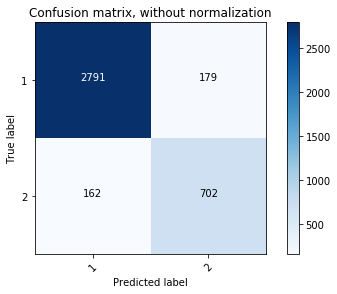

In [10]:
# print results
#reverse the one-ot encoder procedure
Y_test_hard = np.argmax(Y_test_s, axis=1)
Y_pred_hard = np.argmax(Y_pred_s, axis=1)

print("F1-measure: ", utils.f1_score(Y_test_hard, Y_pred_hard, average='weighted'))
print("AUC w.r. to each class: ", utils.AUC(Y_test_s, Y_pred_s, classes))

# Compute and plot confusion matrix
cnf_matrix = utils.confusion_matrix(Y_test_hard, Y_pred_hard)
np.set_printoptions(precision=2)

plt.figure()
utils.plot_confusion_matrix(cnf_matrix, classes=[1,2],
                      title='Confusion matrix, without normalization')

## Task B2: gesture recognition
This task consists of a 17-class classification, where gestures are labeled in column 6.

To tune the following parameters, refer to the first cell of task B1:
- subject: select the subject on which to test the model, between [1,4];
- folder: directory name where '.mat' files are stored;
- label_col: index of feature column to be selected to perform activity detection, between [0,6];
- window_size: parameter that sets the length of temporal windows on which to perform the convolution;
- stride: step length to chose the next window.

Here we just need to preserve the different labels, thus we set 'make_binary' to False. We have then 18 different labels, keeping into account the null class, with label 0.

In [11]:
make_binary = False

In [12]:
# import all sessions for a subject
(data1, data2, data3, data4, data5, data6) = utils.loadData(subject, folder=folder)

# create training set and test set
X_train = np.concatenate((data1['features_interp'],\
                          data2['features_interp'],\
                          data3['features_interp'],\
                          data6['features_interp']), axis=0)

Y_train = np.concatenate((data1['labels_cut'][:,label_col],\
                          data2['labels_cut'][:,label_col],\
                          data3['labels_cut'][:,label_col],\
                          data6['labels_cut'][:,label_col]), axis=0)

X_test = np.concatenate((data4['features_interp'],\
                         data5['features_interp']), axis=0)

Y_test = np.concatenate((data4['labels_cut'][:,label_col],\
                         data5['labels_cut'][:,label_col]))

features = X_test.shape[1]
print("\nTraining samples: ", X_train.shape[0],\
      "\nTest samples:      ", X_test.shape[0],\
      "\nFeatures:            ", features)

# decision to overcome the problem of entire missing columns
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)

# features normalization
scaler = StandardScaler().fit(X_train)
X_train =scaler.transform(X_train)
X_test = scaler.transform(X_test)

# make the problem binary
if make_binary:
    Y_train[Y_train != 0] = 1
    Y_test[Y_test != 0] = 1

# switch to one hot encoded labels
onehot_encoder = OneHotEncoder(sparse=False)
Y_train_oh = onehot_encoder.fit_transform(Y_train.reshape(-1, 1))
Y_test_oh = onehot_encoder.fit_transform(Y_test.reshape(-1, 1))
print("\nClasses in training set: ", Y_train_oh.shape[1],\
      "\nClasses in test set:     ", Y_test_oh.shape[1])


Session shapes:
ADL1:   (45810, 110)
ADL2:   (28996, 110)
ADL3:   (30167, 110)
ADL4:   (30228, 110)
ADL5:   (27308, 110)
Drill:  (52152, 110)

Training samples:  157125 
Test samples:       57536 
Features:             110

Classes in training set:  18 
Classes in test set:      18


In [13]:
import utils
print("Training set:")
X_train_s, Y_train_s = utils.prepareData(X_train, Y_train_oh, window_size, stride, shuffle=False, null_class=False)
print("Test set:")
X_test_s, Y_test_s = utils.prepareData(X_test, Y_test_oh, window_size, stride, shuffle=False, null_class=False)
# add bars plot

Training set:

Features have shape:  (3491, 15, 110) 
Labels have shape:    (3491, 17) 
Fraction of labels:   [0.04 0.04 0.03 0.06 0.06 0.04 0.05 0.04 0.04 0.05 0.04 0.06 0.07 0.03
 0.05 0.24 0.05]
Test set:

Features have shape:  (863, 15, 110) 
Labels have shape:    (863, 17) 
Fraction of labels:   [0.03 0.02 0.03 0.06 0.05 0.02 0.08 0.05 0.03 0.04 0.03 0.07 0.06 0.01
 0.07 0.31 0.03]


In [18]:
classes = np.max((Y_train_s.shape[1], Y_test_s.shape[1]))

In [19]:
model_unidim = utils.Model1D((window_size, features), classes)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 15, 18)            9918      
_________________________________________________________________
batch_normalization_7 (Batch (None, 15, 18)            72        
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 15, 18)            0         
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 8, 18)             0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 8, 36)             4572      
_________________________________________________________________
batch_normalization_8 (Batch (None, 8, 36)             144       
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 8, 36)             0         
__________

In [20]:
opt = Adam(lr=0.01)
model_unidim.compile(optimizer = opt, loss = "categorical_crossentropy", metrics = ["accuracy"])

model_unidim.fit(x = X_train_s, y = Y_train_s, epochs = 50, batch_size = 128, validation_data=(X_test_s, Y_test_s))

Train on 3491 samples, validate on 863 samples
Epoch 1/50
3491/3491 [==============================] - 2s 621us/step - loss: 2.1070 - acc: 0.5107 - val_loss: 1.8029 - val_acc: 0.6338
Epoch 2/50
3491/3491 [==============================] - 0s 115us/step - loss: 1.0573 - acc: 0.6795 - val_loss: 1.2100 - val_acc: 0.6663
Epoch 3/50
3491/3491 [==============================] - 0s 113us/step - loss: 0.8613 - acc: 0.7133 - val_loss: 1.1436 - val_acc: 0.6732
Epoch 4/50
3491/3491 [==============================] - 0s 115us/step - loss: 0.7439 - acc: 0.7462 - val_loss: 1.1648 - val_acc: 0.6651
Epoch 5/50
3491/3491 [==============================] - 0s 116us/step - loss: 0.6937 - acc: 0.7605 - val_loss: 1.1301 - val_acc: 0.6906
Epoch 6/50
3491/3491 [==============================] - 0s 111us/step - loss: 0.6595 - acc: 0.7663 - val_loss: 1.0862 - val_acc: 0.7080
Epoch 7/50
3491/3491 [==============================] - 0s 113us/step - loss: 0.6385 - acc: 0.7763 - val_loss: 1.2054 - val_acc: 0.6883
E

In [21]:
# predict labels
Y_pred_s = model_unidim.predict(X_test_s)

F1-measure:  0.7610596490583601
AUC w.r. to each class:  {0: 0.9204911932522948, 1: 0.9767560230743129, 2: 0.9575030012004802, 3: 0.9805580558055805, 4: 0.9925907425907426, 5: 0.9917550058892814, 6: 0.9466140275999431, 7: 0.959360219068957, 8: 0.9456324582338902, 9: 0.9823588709677419, 10: 0.9582207328937412, 11: 0.9827579365079365, 12: 0.9879137481115232, 13: 0.9376224050137094, 14: 0.9849730178497302, 15: 0.9999812628817688, 16: 1.0}


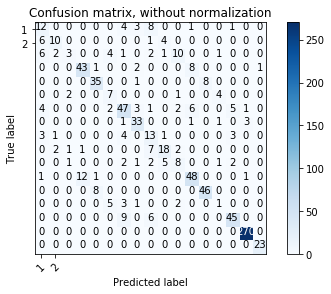

In [22]:
# print results
#reverse the one-ot encoder procedure
Y_test_hard = np.argmax(Y_test_s, axis=1)
Y_pred_hard = np.argmax(Y_pred_s, axis=1)

print("F1-measure: ", utils.f1_score(Y_test_hard, Y_pred_hard, average='weighted'))
print("AUC w.r. to each class: ", utils.AUC(Y_test_s, Y_pred_s, classes))

# Compute and plot confusion matrix
cnf_matrix = utils.confusion_matrix(Y_test_hard, Y_pred_hard)
np.set_printoptions(precision=2)

plt.figure()
utils.plot_confusion_matrix(cnf_matrix, classes=[1,2],
                      title='Confusion matrix, without normalization')